## Amelia Do - Section B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [1]:
# Add the boilerplate code for importing the required packages and data

import pandas as pandas
import matplotlib.pyplot as plt

# load data from titanic_train_clean.csv into a pandas dataframe
df = pandas.read_csv('titanic.csv')

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [2]:
# Number of passengers recorded in the log 
num_passengers = len(df)
print(num_passengers)

# Percentage of male passengers in the log
male_passengers = df[df['Sex'] == 1].shape[0]
male_passengers_percent = male_passengers / num_passengers * 100
print(male_passengers_percent)

# Percentage of survivors
survivors = df[df['Survived'] == 1].shape[0]
survivors_percent = survivors / num_passengers * 100
print(survivors_percent)

891
64.75869809203144
38.38383838383838


Your written answer:

 - *Number of passengers written in the log:* 891
 - *Percentage of passengers that are male:* 64.75%
 - *Percentage of passenger that survived:* 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [3]:
'''your code here'''
# Percentage of female passengers survived
female_passengers = df[df['Sex'] == 0].shape[0] # number of female passengers
survived_female_passengers = df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] # number of survived female passengers
survived_male_passengers = df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] # number of survived male passengers

survived_female_percent = (survived_female_passengers / female_passengers) * 100 # percentage
survived_male_percent = (survived_male_passengers / male_passengers) * 100
print(survived_female_percent)
print(survived_male_percent)

74.20382165605095
18.890814558058924


Your written answer:
 - *Percentage of female passengers:* 74.20%
 - *Percentage of male passengers:* 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [4]:
# Number of first class passengers
first_class_passengers = df[df['Pclass'] == 1].shape[0]
percent_first_class = (first_class_passengers / num_passengers) * 100
print(f"Percentage of first class tickets: {percent_first_class:.2f}%")

survived_first_class = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0]
survived_first_class_percent = (survived_first_class / first_class_passengers) * 100
print(f"Percentage of first class passengers who survived: {survived_first_class_percent:.2f}%")

# Number of second class passengers
second_class_passengers = df[df['Pclass'] == 2].shape[0]
percent_second_class = (second_class_passengers / num_passengers) * 100
print(f"Percentage of second class tickets: {percent_second_class:.2f}%")

survived_second_class = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0]
survived_second_class_percent = (survived_second_class / second_class_passengers) * 100
print(f"Percentage of second class passengers who survived: {survived_second_class_percent:.2f}%")

# Number of third class passengers
third_class_passengers = df[df['Pclass'] == 3].shape[0]
percent_third_class = (third_class_passengers / num_passengers) * 100
print(f"Percentage of third class tickets: {percent_third_class:.2f}%")

survived_third_class = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0]
survived_third_class_percent = (survived_third_class / third_class_passengers) * 100
print(f"Percentage of third class passengers who survived: {survived_third_class_percent:.2f}%")

Percentage of first class tickets: 24.24%
Percentage of first class passengers who survived: 62.96%
Percentage of second class tickets: 20.65%
Percentage of second class passengers who survived: 47.28%
Percentage of third class tickets: 55.11%
Percentage of third class passengers who survived: 24.24%


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

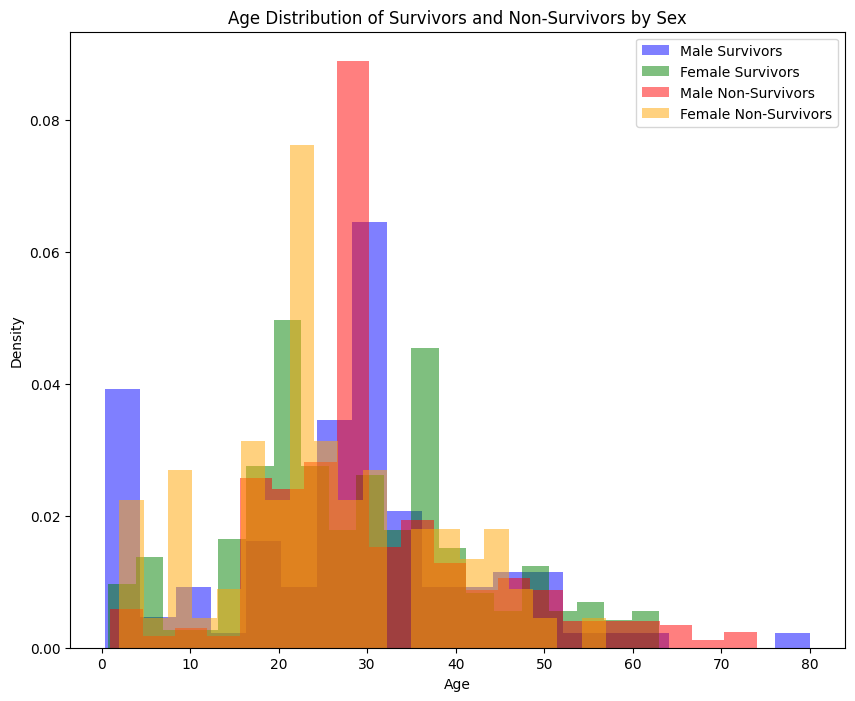

In [6]:
survivors_df = df[df['Survived'] == 1][['Age', 'Sex']]
non_survivors_df = df[df['Survived'] == 0][['Age', 'Sex']]

male_survivors = survivors_df[survivors_df['Sex'] == 1]['Age'].dropna()
female_survivors = survivors_df[survivors_df['Sex'] == 0]['Age'].dropna()
male_non_survivors = non_survivors_df[non_survivors_df['Sex'] == 1]['Age'].dropna()
female_non_survivors = non_survivors_df[non_survivors_df['Sex'] == 0]['Age'].dropna()

plt.figure(figsize=(10, 8))
plt.hist(male_survivors, bins=20, density=True, alpha=0.5, label='Male Survivors', color='blue')
plt.hist(female_survivors, bins=20, density=True, alpha=0.5, label='Female Survivors', color='green')
plt.hist(male_non_survivors, bins=20, density=True, alpha=0.5, label='Male Non-Survivors', color='red')
plt.hist(female_non_survivors, bins=20, density=True, alpha=0.5, label='Female Non-Survivors', color='orange')

plt.title('Age Distribution of Survivors and Non-Survivors by Sex')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

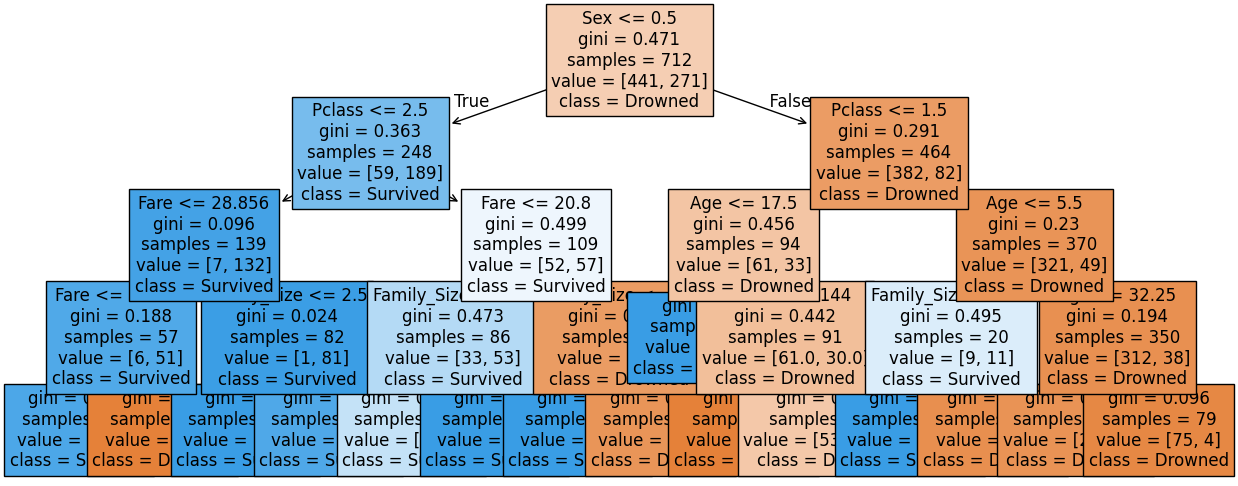

In [8]:
# Define label and features
label = 'Survived'  # Changed to a string for a single label
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2)

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

# Plot the decision tree
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plot_tree(tree_clf, feature_names=features, class_names=['Drowned', 'Survived'], filled=True, fontsize=12)

plt.show()

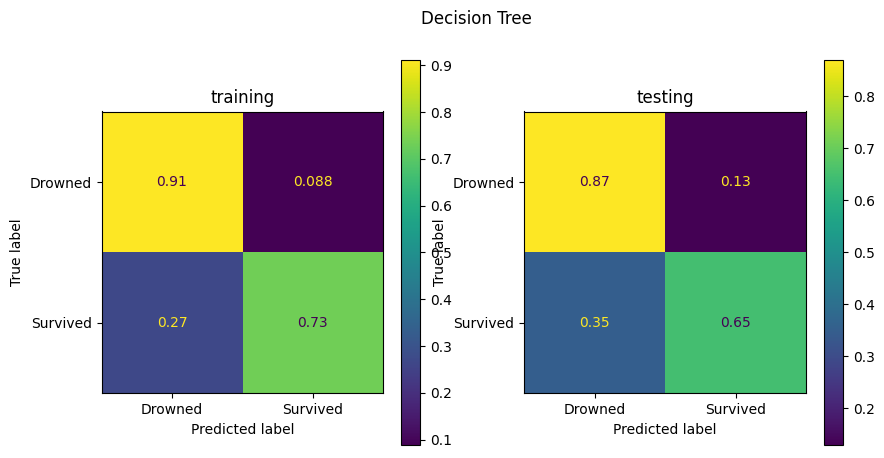

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()


knn_clf = KNeighborsClassifier(n_neighbors = 15,)
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=15)

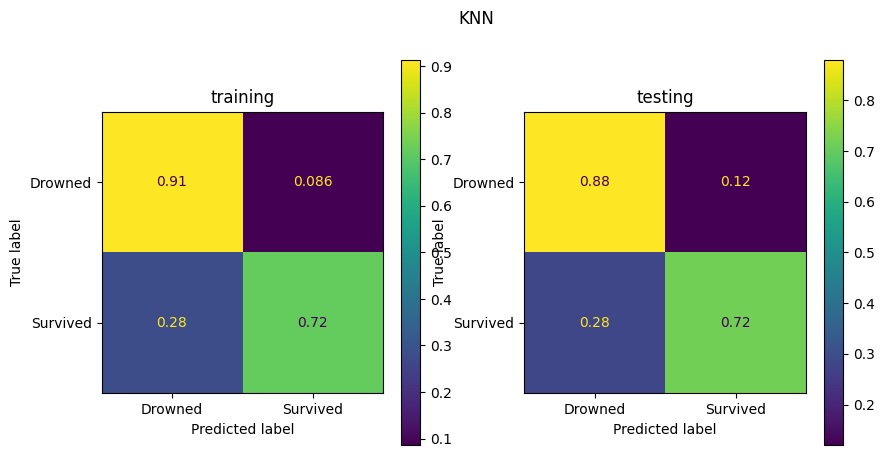

In [11]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - KNN performs well on the training data, with only a small number of misclassifications, indicating that it has learned the patterns in the training data effectively.
 - On the test data, KNN maintains good performance, though there is a slight increase in misclassifications. This suggests that KNN generalizes well without significant overfitting on this dataset.

 - SVM also performs well on the training data, though it has more false positives and false negatives compared to KNN, suggesting it might be slightly underfitting the training data.
 - The test performance for SVM is comparable to that of KNN, with similar levels of accuracy and a slight decrease in performance due to the increased misclassifications. However, SVM maintains consistent performance on both training and test data, which indicates a good generalization.

Which models did you fit and which worked better?
 - Both models performed well, but KNN seems to have a slight edge in training performance with fewer false positives and false negatives, indicating that it may be better suited for this dataset.
 - SVM has slightly higher misclassifications in training but shows stability across training and test sets, indicating good generalization.
 - **In summary, KNN achieved better performance in this specific setup, though SVM could be more robust depending on future data and further tuning.**